<a href="https://colab.research.google.com/github/abhinavbammidi1401/Reinforcement_learning/blob/main/rl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [33]:
!pip install pyvirtualdisplay

In [34]:
!pip install pygame

In [35]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

env = gym.make('Taxi-v3')

In [36]:
from pyvirtualdisplay import Display
from matplotlib import animation
from IPython.display import display
from IPython.display import clear_output

d = Display()
d.start()

Episode: 9
Score: -920


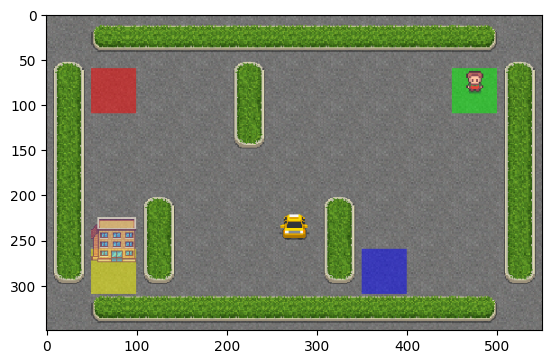

In [37]:
episodes = 10

for episode in range(1, episodes):
  state = env.reset()
  done = False
  score = 0
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  while not done:
    next_state, reward, done, info = env.step(env.action_space.sample())
    score += reward
    clear_output(wait=True)
    img.append(env.render('rgb_array'))
  print('Episode: {}\nScore: {}'.format(episode, score))

In [38]:
'''dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))'''

"dpi = 72\ninterval = 50 # ms\n\nplt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)\npatch = plt.imshow(img[0])\nplt.axis=('off')\nanimate = lambda i: patch.set_data(img[i])\nani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)\ndisplay.display(display.HTML(ani.to_jshtml()))"

# Implement the Q-Learning Algorithm from Scratch.

In [39]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

### Create the parameters for out Q-Learning Algorithm

In [40]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

### Update function

In [41]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):

    #Exploration Vs Exploitation trade-off
    exploration_threshold = np.random.uniform(0, 1)
    # if greater than then we will take an action based on the q_table
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)

    #Update Q-Table
    #the equation in the image above is without multipluing q_table[state, action] with (1-learning_rate)
    #this is a variation of the previous equation (most common used)
    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break

  #A mathemalical equation to decay the exploration rate over time so we start take action from our Q-Table instead of taking random action
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [42]:
q_table

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.03945471,   0.80253937,  -3.94820591,   1.43409724,
          9.6220697 ,  -5.79820487],
       [  6.77411449,   8.17280025,   4.65968198,   5.41967258,
         14.11880599,  -2.14837234],
       ...,
       [ -1.31065269,  10.5247119 ,  -1.25498338,  -1.69026892,
         -5.52837712,  -5.9238297 ],
       [ -3.09146759,  -3.0410127 ,  -3.10609305,   1.5018925 ,
         -9.57384697, -10.55506443],
       [  6.28303467,   2.67098803,   6.70120331,  18.78637325,
         -0.25123942,  -0.56433272]])

### Evaluating the model

In [43]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000

Average per thousand episodes
1000 :  -255.2279999999999
2000 :  -36.41099999999997
3000 :  2.127999999999995
4000 :  5.75099999999997
5000 :  6.9669999999999765
6000 :  7.355999999999972
7000 :  7.408999999999971
8000 :  7.268999999999952
9000 :  7.5169999999999595
10000 :  7.395999999999959


step:  14  reward:  20
******Reached Goal******


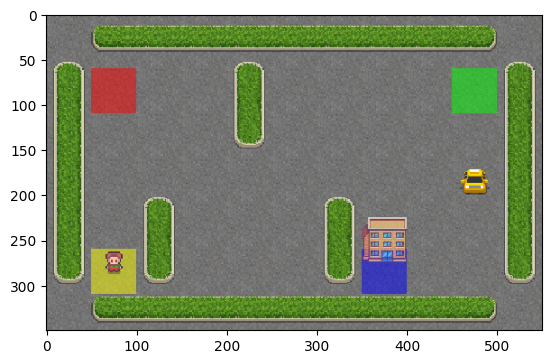

In [44]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)


    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

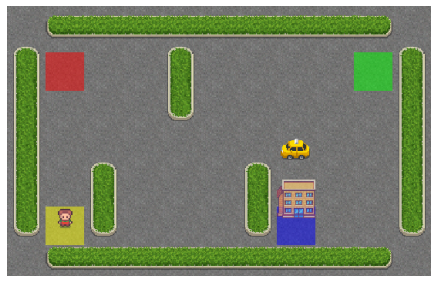

In [45]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML

# Define constants
dpi = 72
interval = 50  # milliseconds

# Assuming `img` is a list of frames (images) that you want to animate
# Replace `img` with your actual list of frames
# Example: img = [frame1, frame2, ...]

# Create the figure with the appropriate size
fig, ax = plt.subplots(figsize=(img[0].shape[1] / dpi, img[0].shape[0] / dpi), dpi=dpi)

# Initialize the display with the first frame
patch = ax.imshow(img[0])
ax.axis('off')  # Turn off the axis

# Define the animation function
def animate(i):
    patch.set_data(img[i])  # Update the image data
    return patch,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(img), interval=interval)

# Display the animation as HTML
display(HTML(ani.to_jshtml()))